### LSTM용 데이터셋1

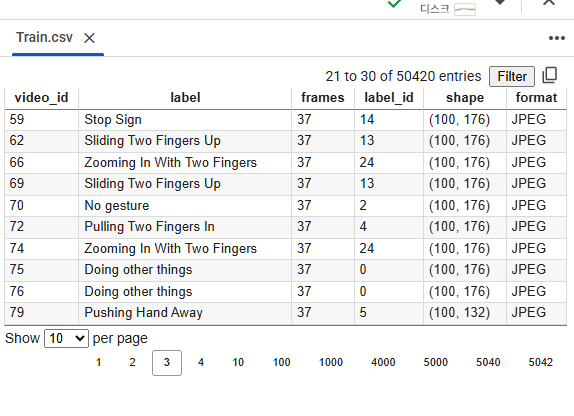

In [ ]:
import kagglehub
import shutil

# Download latest version
path = kagglehub.dataset_download("toxicmender/20bn-jester")

target_path = "/content/my_jester_dataset"
shutil.move(path, target_path)

100%|██████████| 11.9G/11.9G [02:32<00:00, 83.8MB/s]

Extracting files...


'/content/my_jester_dataset'

In [ ]:
import os

# data_path = "/root/.cache/kagglehub/datasets/toxicmender/20bn-jester/versions/3"
data_path = "/content/my_jester_dataset/Train"

# 전체 파일/폴더 구조 확인 (상위 20개만)
for root, dirs, files in os.walk(data_path):
    print("Folder:", root)
    print("Subfolders:", dirs)
    print("Files (first 10):", files[:10])
    print("---")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
---
Folder: /content/my_jester_dataset/Train/135884
Subfolders: []
Files (first 10): ['00030.jpg', '00001.jpg', '00011.jpg', '00017.jpg', '00003.jpg', '00029.jpg', '00006.jpg', '00012.jpg', '00014.jpg', '00005.jpg']
---
Folder: /content/my_jester_dataset/Train/46494
Subfolders: []
Files (first 10): ['00030.jpg', '00001.jpg', '00011.jpg', '00017.jpg', '00003.jpg', '00029.jpg', '00006.jpg', '00012.jpg', '00014.jpg', '00005.jpg']
---
Folder: /content/my_jester_dataset/Train/24890
Subfolders: []
Files (first 10): ['00030.jpg', '00001.jpg', '00011.jpg', '00017.jpg', '00003.jpg', '00029.jpg', '00006.jpg', '00012.jpg', '00014.jpg', '00005.jpg']
---
Folder: /content/my_jester_dataset/Train/82489
Subfolders: []
Files (first 10): ['00030.jpg', '00001.jpg', '00011.jpg', '00017.jpg', '00003.jpg', '00029.jpg', '00006.jpg', '00012.jpg', '00014.jpg', '00005.jpg']
---
Folder: /content/my_jester_dataset/Train/16450
Subfolders: []
Files (first 10): ['00030.jpg', '0000

KeyboardInterrupt: 

In [ ]:
# import os
# from PIL import Image
# import numpy as np

# clip_path = "/root/.cache/kagglehub/datasets/toxicmender/20bn-jester/versions/3/Test/144547"

# # 프레임 파일 정렬
# frames = sorted([f for f in os.listdir(clip_path) if f.endswith(".jpg")])

# # 이미지 불러와서 numpy array로 변환
# clip_frames = []
# for f in frames:
#     img = Image.open(os.path.join(clip_path, f)).resize((112, 112))  # 크기 줄이기
#     clip_frames.append(np.array(img))

# clip_frames = np.stack(clip_frames)  # (num_frames, H, W, C)
# print(clip_frames.shape)

In [ ]:
import pandas as pd

csv_path = "/content/my_jester_dataset/Train.csv"  # CSV 경로
df = pd.read_csv(csv_path)

# label 컬럼에서 고유 클래스 확인
classes = df['label'].unique()
print("총 클래스 개수:", len(classes))
print(classes)

총 클래스 개수: 27
['Doing other things' 'Pushing Two Fingers Away' 'Drumming Fingers'
 'Sliding Two Fingers Down' 'Pushing Hand Away' 'Shaking Hand'
 'Pulling Two Fingers In' 'Stop Sign' 'Zooming In With Two Fingers'
 'Sliding Two Fingers Up' 'Zooming Out With Two Fingers'
 'Zooming In With Full Hand' 'No gesture' 'Swiping Right' 'Thumb Down'
 'Rolling Hand Forward' 'Pulling Hand In' 'Zooming Out With Full Hand'
 'Swiping Left' 'Rolling Hand Backward' 'Turning Hand Counterclockwise'
 'Swiping Up' 'Turning Hand Clockwise' 'Sliding Two Fingers Left'
 'Swiping Down' 'Thumb Up' 'Sliding Two Fingers Right']


1. Doing other things
특별한 정의된 제스처가 아닌, 다른 행동을 하고 있는 상태.

12. Zooming In With Full Hand
손 전체를 벌려서 확대하는 동작.

13. No gesture
명확한 제스처가 없는 상태.

15. Thumb Down
엄지손가락을 아래로 내리는 제스처.

26. Thumb Up
엄지손가락을 위로 세우는 제스처.

Pulling Hand In
Pushing_hand_Away

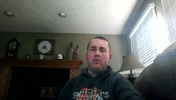

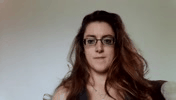

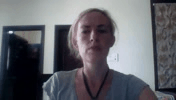

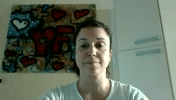

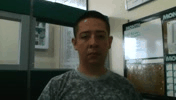

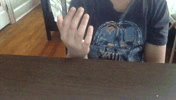

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import os
from PIL import Image
from IPython.display import display, HTML

csv_path = "/content/my_jester_dataset/Train.csv"
data_root = "/content/my_jester_dataset/Train"

df = pd.read_csv(csv_path)

# target_classes = [
#     "Doing other things",
#     "Zooming In With Full Hand",
#     "No gesture",
#     "Thumb Down",
#     "Thumb Up"
# ]

target_classes = [
 'Doing other things', 'Pushing Two Fingers Away', 'Drumming Fingers',
 'Sliding Two Fingers Down', 'Pushing Hand Away', 'Shaking Hand',
 'Pulling Two Fingers In', 'Stop Sign', 'Zooming In With Two Fingers',
 'Sliding Two Fingers Up', 'Zooming Out With Two Fingers',
 'Zooming In With Full Hand', 'No gesture', 'Swiping Right', 'Thumb Down',
 'Rolling Hand Forward', 'Pulling Hand In', 'Zooming Out With Full Hand',
 'Swiping Left', 'Rolling Hand Backward', 'Turning Hand Counterclockwise',
 'Swiping Up', 'Turning Hand Clockwise', 'Sliding Two Fingers Left',
 'Swiping Down', 'Thumb Up', 'Sliding Two Fingers Right'
]

# 각 클래스 대표 영상 폴더에서 이미지 읽기
frames_per_class = []
for cls in target_classes:
    video_id = df[df['label']==cls].iloc[0]['video_id']
    video_folder = os.path.join(data_root, str(video_id))
    frame_files = sorted([f for f in os.listdir(video_folder) if f.endswith('.jpg')])

    # PIL Image로 변환
    images = [Image.open(os.path.join(video_folder, f)) for f in frame_files]
    frames_per_class.append(images)

# 클래스별 GIF로 저장
for cls, images in zip(target_classes, frames_per_class):
    gif_path = f"/content/gifs1/{cls.replace(' ', '_')}.gif"
    images[0].save(
        gif_path,
        save_all=True,
        append_images=images[1:],
        duration=100,  # 각 프레임 표시 시간(ms)
        loop=0  # 무한 반복
    )
    display(HTML(f"<h3>{cls}</h3>"))
    display(Image.open(gif_path))

In [ ]:
import pandas as pd
import os
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import HTML
from base64 import b64encode

csv_path = "/content/my_jester_dataset/Train.csv"
data_root = "/content/my_jester_dataset/Train"

df = pd.read_csv(csv_path)

target_classes = [
    "Doing other things",
    "Zooming In With Full Hand",
    "No gesture",
    "Thumb Down",
    "Thumb Up"
]

def create_video_from_frames(frame_folder, output_path, fps=10):
    frame_files = sorted([f for f in os.listdir(frame_folder) if f.endswith('.jpg')])
    if not frame_files:
        print("No frames found in", frame_folder)
        return

    # 첫 프레임으로 사이즈 결정
    first_frame = cv2.imread(os.path.join(frame_folder, frame_files[0]))
    height, width, _ = first_frame.shape

    # 비디오 라이터
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    for f in frame_files:
        frame = cv2.imread(os.path.join(frame_folder, f))
        out.write(frame)
    out.release()

def display_video(path):
    mp4 = open(path,'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    return HTML(f"""<video width=400 controls><source src="{data_url}" type="video/mp4"></video>""")

for cls in target_classes:
    video_id = df[df['label']==cls].iloc[0]['video_id']
    video_folder = os.path.join(data_root, str(video_id))
    output_video_path = f"/content/{cls.replace(' ','_')}.mp4"

    create_video_from_frames(video_folder, output_video_path)
    display(display_video(output_video_path))

### LSTM용 데이터셋2 (참고로 30프레임)
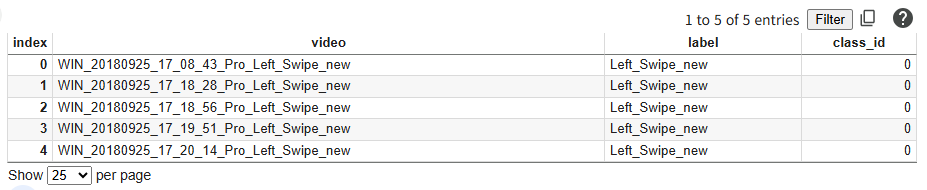

In [ ]:
import kagglehub
import shutil

# Download latest version
path = kagglehub.dataset_download("imsparsh/gesture-recognition")

target_path = "/content/my_gesture_dataset"
shutil.move(path, target_path)

100%|██████████| 1.60G/1.60G [00:23<00:00, 73.2MB/s]

Extracting files...


'/content/my_gesture_dataset'

In [ ]:
import pandas as pd

DATA_PATH = "/content/my_gesture_dataset/train.csv"

df = pd.read_csv(DATA_PATH, sep=';', engine='python', header=None)

df.columns = ['video', 'label', 'class_id']
df['class_id'] = df['class_id'].astype(int)

In [ ]:
df.head()

,video,label,class_id
0,WIN_20180925_17_08_43_Pro_Left_Swipe_new,Left_Swipe_new,0
1,WIN_20180925_17_18_28_Pro_Left_Swipe_new,Left_Swipe_new,0
2,WIN_20180925_17_18_56_Pro_Left_Swipe_new,Left_Swipe_new,0
3,WIN_20180925_17_19_51_Pro_Left_Swipe_new,Left_Swipe_new,0
4,WIN_20180925_17_20_14_Pro_Left_Swipe_new,Left_Swipe_new,0


In [ ]:
import os

# data_path = "/root/.cache/kagglehub/datasets/toxicmender/20bn-jester/versions/3"
data_path = "/content/my_gesture_dataset/train"

# 전체 파일/폴더 구조 확인 (상위 20개만)
for root, dirs, files in os.walk(data_path):
    print("Folder:", root)
    print("Subfolders:", dirs)
    print("Files (first 10):", files[:10])
    print("---")

Folder: /content/my_gesture_dataset/train
Subfolders: ['WIN_20180925_17_28_48_Pro_Stop_new', 'WIN_20180907_15_56_26_Pro_Thumbs Up_new', 'WIN_20180925_17_56_48_Pro_Stop_new', 'WIN_20180926_17_13_29_Pro_Thumbs_Up_new', 'WIN_20180907_16_25_52_Pro_Thumbs Down_new', 'WIN_20180907_16_20_37_Pro_Thumbs Up_new', 'WIN_20180907_15_56_07_Pro_Stop Gesture_new', 'WIN_20180925_17_42_50_Pro_Thumbs_Down_new', 'WIN_20180926_17_30_47_Pro_Thumbs_Up_new', 'WIN_20180926_17_49_29_Pro_Stop_new', 'WIN_20180926_17_01_07_Pro_Thumbs_Up_new', 'WIN_20180926_16_58_07_Pro_Thumbs_Up_new', 'WIN_20180926_17_24_55_Pro_Stop_new', 'WIN_20180926_16_57_34_Pro_Left_Swipe_new', 'WIN_20180926_17_22_16_Pro_Thumbs_Up_new', 'WIN_20180925_17_55_45_Pro_Thumbs_Down_new', 'WIN_20180926_17_39_18_Pro_Thumbs_Down_new', 'WIN_20180907_16_10_07_Pro_Thumbs Down_new', 'WIN_20180926_16_49_15_Pro_Left_Swipe_new', 'WIN_20180925_17_50_59_Pro_Right_Swipe_new', 'WIN_20180925_17_49_07_Pro_Left_Swipe_new', 'WIN_20180926_17_18_39_Pro_Thumbs_Down_new',

In [ ]:
classes = df['label'].unique()
print("총 클래스 개수:", len(classes))
print(classes)

총 클래스 개수: 10
['Left_Swipe_new' 'Right_Swipe_new' 'Stop_new' 'Thumbs_Down_new'
 'Thumbs_Up_new' 'Left Swipe_new_Left Swipe_new' 'Right Swipe_new'
 'Stop Gesture_new' 'Thumbs Down_new' 'Thumbs Up_new']


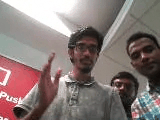

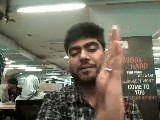

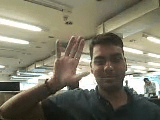

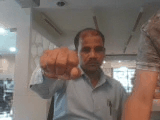

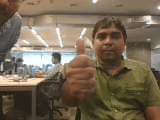

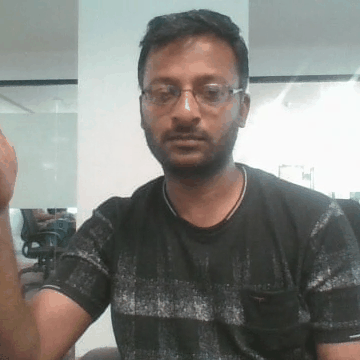

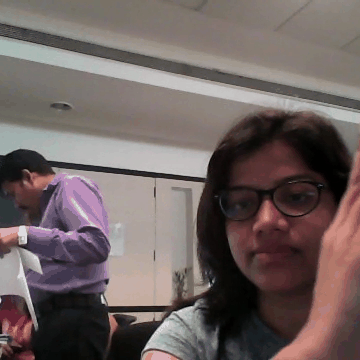

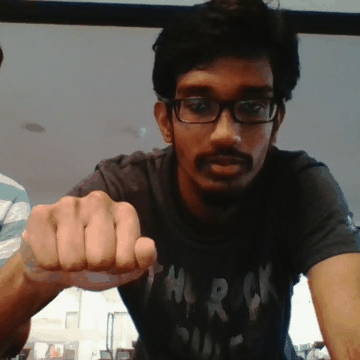

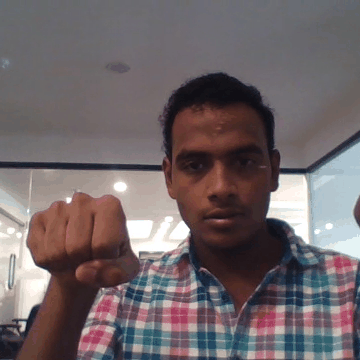

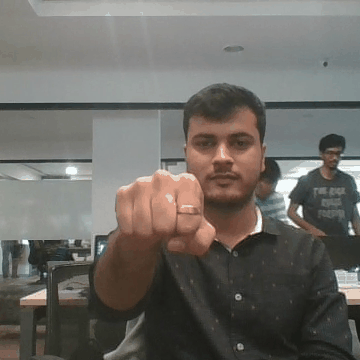

In [ ]:
import os
from PIL import Image
from IPython.display import display, HTML

data_root = "/content/my_gesture_dataset/train"

# target_classes = [
#     "Doing other things",
#     "Zooming In With Full Hand",
#     "No gesture",
#     "Thumb Down",
#     "Thumb Up"
# ]

target_classes = df['label'].unique()

# 각 클래스 대표 영상 폴더에서 이미지 읽기
frames_per_class = []
for cls in target_classes:
    video_id = df[df['label']==cls].iloc[0]['video']
    video_folder = os.path.join(data_root, str(video_id))
    frame_files = sorted([f for f in os.listdir(video_folder) if f.endswith('.png')])

    # PIL Image로 변환
    images = [Image.open(os.path.join(video_folder, f)) for f in frame_files]
    frames_per_class.append(images)

# 클래스별 GIF로 저장
for cls, images in zip(target_classes, frames_per_class):
    gif_path = f"/content/gifs2/{cls.replace(' ', '_')}.gif"
    images[0].save(
        gif_path,
        save_all=True,
        append_images=images[1:],
        duration=100,  # 각 프레임 표시 시간(ms)
        loop=0  # 무한 반복
    )
    display(HTML(f"<h3>{cls}</h3>"))
    display(Image.open(gif_path))

Stop_Gesture_new 랑
Thumbs_Up_new 얘만 쓸듯?

In [ ]:
import os
import pandas as pd

data_root = "/content/my_gesture_dataset/train"

# df에는 video 컬럼에 '각 비디오 폴더 경로'가 있다고 가정
for video_id in df['video']:
    video_folder = os.path.join(data_root, str(video_id))
    if not os.path.exists(video_folder):
        print(f"Folder does not exist: {video_folder}")
        continue

    # 이미지 파일만 세기 (jpg, png 등)
    frame_files = [f for f in os.listdir(video_folder) if f.endswith(('.jpg', '.png'))]
    frame_files.sort()  # 순서대로 정렬
    frame_count = len(frame_files)

    print(f"{video_folder}: {frame_count} frames")

/content/my_gesture_dataset/train/WIN_20180925_17_08_43_Pro_Left_Swipe_new: 30 frames
/content/my_gesture_dataset/train/WIN_20180925_17_18_28_Pro_Left_Swipe_new: 30 frames
/content/my_gesture_dataset/train/WIN_20180925_17_18_56_Pro_Left_Swipe_new: 30 frames
/content/my_gesture_dataset/train/WIN_20180925_17_19_51_Pro_Left_Swipe_new: 30 frames
/content/my_gesture_dataset/train/WIN_20180925_17_20_14_Pro_Left_Swipe_new: 30 frames
/content/my_gesture_dataset/train/WIN_20180925_17_21_28_Pro_Left_Swipe_new: 30 frames
/content/my_gesture_dataset/train/WIN_20180925_17_22_55_Pro_Left_Swipe_new: 30 frames
/content/my_gesture_dataset/train/WIN_20180925_17_24_49_Pro_Left_Swipe_new: 30 frames
/content/my_gesture_dataset/train/WIN_20180925_17_26_25_Pro_Left_Swipe_new: 30 frames
/content/my_gesture_dataset/train/WIN_20180925_17_26_51_Pro_Left_Swipe_new: 30 frames
/content/my_gesture_dataset/train/WIN_20180925_17_27_40_Pro_Left_Swipe_new: 30 frames
/content/my_gesture_dataset/train/WIN_20180925_17_29_5

### 얘는 걍 욜로로 제스쳐 예측

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Jo9IR9UbvccipcRzvBg2")
project = rf.workspace("humanoffice").project("hagrid-yolo")
version = project.version(4)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 85.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to HAGRID-YOLO-4 in yolov8:: 100%|██████████| 15212/15212 [00:01<00:00, 8471.59it/s] 


In [ ]:
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.3 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO('yolov8n.pt')
results = model.train(data='/content/HAGRID-YOLO-4/data.yaml', epochs=10, imgsz=640)

Ultralytics 8.3.184 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/HAGRID-YOLO-4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretra

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,823 parameters, 3,011,807 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 786.5±199.8 MB/s, size: 28.3 KB)


train: Scanning /content/HAGRID-YOLO-4/train/labels... 6000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6000/6000 [00:02<00:00, 2060.49it/s]


train: New cache created: /content/HAGRID-YOLO-4/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 603.0±262.8 MB/s, size: 25.0 KB)


val: Scanning /content/HAGRID-YOLO-4/valid/labels... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:00<00:00, 1114.08it/s]

val: New cache created: /content/HAGRID-YOLO-4/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.08G     0.9826      2.441      1.039         18        640: 100%|██████████| 375/375 [01:43<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.29it/s]


                   all        800        993      0.926      0.844      0.936      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.59G     0.8742      1.115     0.9879         18        640: 100%|██████████| 375/375 [01:36<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.87it/s]

                   all        800        993      0.929      0.902      0.947      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10       2.6G     0.8557     0.7986     0.9938         19        640: 100%|██████████| 375/375 [01:36<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.01it/s]

                   all        800        993      0.925      0.895      0.949      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.62G     0.8196     0.6533     0.9745         22        640: 100%|██████████| 375/375 [01:37<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.12it/s]

                   all        800        993      0.952      0.925      0.967      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.64G     0.7861     0.5589     0.9601         18        640: 100%|██████████| 375/375 [01:34<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.08it/s]

                   all        800        993       0.97      0.934      0.976      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.66G       0.75     0.5104     0.9429         18        640: 100%|██████████| 375/375 [01:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.41it/s]


                   all        800        993      0.952      0.945      0.978      0.782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.67G     0.7281     0.4618     0.9288         18        640: 100%|██████████| 375/375 [01:35<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.03it/s]

                   all        800        993      0.975      0.945       0.98      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.69G     0.7017     0.4249     0.9194         18        640: 100%|██████████| 375/375 [01:36<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.24it/s]

                   all        800        993      0.975      0.964      0.984      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.71G     0.6831     0.3958      0.909         19        640: 100%|██████████| 375/375 [01:34<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.10it/s]

                   all        800        993      0.978      0.973      0.986      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.72G     0.6542     0.3636     0.8985         19        640: 100%|██████████| 375/375 [01:36<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.15it/s]

                   all        800        993      0.976      0.978      0.987       0.82



10 epochs completed in 0.285 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.184 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.86it/s]


                   all        800        993      0.976      0.978      0.987      0.821
                  like        200        200      0.979       0.98      0.994      0.823
             nogesture        193        193      0.927      0.922      0.954      0.673
                    ok        200        200      0.984      0.995      0.995       0.88
                 peace        200        200      0.997          1      0.995      0.846
                  stop        200        200      0.992      0.995      0.995       0.88
Speed: 0.2ms preprocess, 1.8ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train


In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')
# model = YOLO('/content/best.pt')

metrics = model.val(
    data='/content/HAGRID-YOLO-4/data.yaml',
    split='val'
)

# 평가 결과는 'metrics' 객체에 저장되며, mAP50, mAP50-95 등의 지표를 확인할 수 있습니다.
print("mAP50-95:", metrics.box.map)
print("mAP50:", metrics.box.map50)

Ultralytics 8.3.184 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1066.6±428.6 MB/s, size: 24.6 KB)


val: Scanning /content/HAGRID-YOLO-4/valid/labels.cache... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.35it/s]


                   all        800        993      0.978      0.979      0.987      0.822
                  like        200        200      0.979       0.98      0.994      0.823
             nogesture        193        193      0.937      0.927      0.956      0.676
                    ok        200        200      0.984      0.995      0.995       0.88
                 peace        200        200      0.997          1      0.995      0.847
                  stop        200        200      0.992      0.995      0.995      0.881
Speed: 0.4ms preprocess, 3.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val
mAP50-95: 0.8215266063783766
mAP50: 0.9870459908222131



image 1/1 /content/11.PNG: 640x480 1 peace, 78.4ms
Speed: 4.0ms preprocess, 78.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


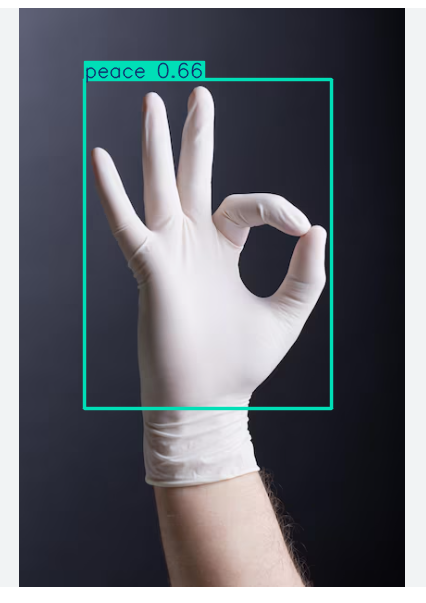

감지된 객체: peace, 신뢰도: 0.66, 바운딩 박스: [ 84  79 331 408]


In [ ]:
import cv2
from google.colab.patches import cv2_imshow # 코랩에서 이미지 출력을 위해 필요

# test_source = '/content/HAGRID-YOLO-4/valid/images/fde892cd-571e-44c2-b610-14e9aab16b3d_jpg.rf.bf4a89dc2142325674801d8419dc3663.jpg'
# test_source = '/content/images.jpg'
test_source = '/content/11.PNG'

# 예측을 실행하고 결과를 시각화합니다.
# show=True: 코랩 노트북에 결과 이미지를 직접 표시합니다.
# save=True: 예측 결과(바운딩 박스가 그려진 이미지)를 'runs/detect/predict/' 폴더에 저장합니다.
results = model.predict(source=test_source, show=False, save=True, conf=0.25)

cv2_imshow(results[0].plot())

# 예측 결과를 상세하게 확인하려면 다음과 같이 반복문을 사용할 수 있습니다.
for r in results:
    for box in r.boxes:
        cls_id = int(box.cls[0])
        label = model.names[cls_id]
        confidence = box.conf[0].item()
        bbox = box.xyxy[0].cpu().numpy().astype(int) # 바운딩 박스 좌표 [x1, y1, x2, y2]

        print(f"감지된 객체: {label}, 신뢰도: {confidence:.2f}, 바운딩 박스: {bbox}")

### 아놔 코랩에선 자바스크립트로 카메라 받아와서 켜야한다네;;

In [ ]:
from IPython.display import display, Javascript
from google.colab.patches import cv2_imshow
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from PIL import Image
import io

# 카메라 실행용 자바스크립트
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
          const div = document.createElement('div');
          const capture = document.createElement('button');
          capture.textContent = '📸 Capture';
          div.appendChild(capture);

          const video = document.createElement('video');
          video.style.display = 'block';
          video.style.transform = 'scaleX(-1)';
          const stream = await navigator.mediaDevices.getUserMedia({video: true});

          document.body.appendChild(div);
          div.appendChild(video);
          video.srcObject = stream;
          await video.play();

          // 캡처 버튼 누를 때까지 대기
          await new Promise((resolve) => capture.onclick = resolve);

          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);

          stream.getTracks().forEach(track => track.stop());
          div.remove()

          return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# 📸 실행 (사진 촬영)
filename = take_photo()
print("Saved to", filename)

# 이미지 확인
img = cv2.imread(filename)
flipped = cv2.flip(img, 1)
cv2_imshow(flipped)

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

### mediapipe

In [ ]:
!pip install mediapipe

Saving 8c2647e3-b76d-4d8a-9a33-99db51add2a2.jpg to 8c2647e3-b76d-4d8a-9a33-99db51add2a2.jpg


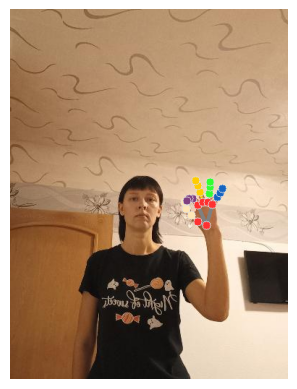

Hand landmarks:
Landmark 0: (x=0.7069, y=0.5855, z=0.0000)
Landmark 1: (x=0.6768, y=0.5754, z=-0.0103)
Landmark 2: (x=0.6519, y=0.5575, z=-0.0173)
Landmark 3: (x=0.6335, y=0.5402, z=-0.0249)
Landmark 4: (x=0.6288, y=0.5228, z=-0.0314)
Landmark 5: (x=0.6766, y=0.5297, z=-0.0037)
Landmark 6: (x=0.6587, y=0.5119, z=-0.0208)
Landmark 7: (x=0.6444, y=0.5128, z=-0.0342)
Landmark 8: (x=0.6375, y=0.5188, z=-0.0408)
Landmark 9: (x=0.6934, y=0.5225, z=-0.0064)
Landmark 10: (x=0.6837, y=0.4954, z=-0.0178)
Landmark 11: (x=0.6757, y=0.4779, z=-0.0262)
Landmark 12: (x=0.6691, y=0.4629, z=-0.0313)
Landmark 13: (x=0.7120, y=0.5223, z=-0.0122)
Landmark 14: (x=0.7185, y=0.4981, z=-0.0254)
Landmark 15: (x=0.7210, y=0.4823, z=-0.0324)
Landmark 16: (x=0.7208, y=0.4687, z=-0.0353)
Landmark 17: (x=0.7286, y=0.5284, z=-0.0188)
Landmark 18: (x=0.7449, y=0.5095, z=-0.0296)
Landmark 19: (x=0.7562, y=0.4966, z=-0.0325)
Landmark 20: (x=0.7648, y=0.4854, z=-0.0330)


In [ ]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np

# MediaPipe Hands 솔루션 불러오기
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# 코랩에 파일 업로드
from google.colab import files
uploaded = files.upload()
image_file = next(iter(uploaded))

# 이미지 불러오기
image = cv2.imread(image_file)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# MediaPipe Hands 모델 초기화
# static_image_mode=True: 이미지마다 손을 다시 감지 (영상 스트림이 아님)
# max_num_hands=2: 최대 2개의 손을 감지
# min_detection_confidence=0.5: 손 감지 최소 신뢰도
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:

    # 이미지 처리
    results = hands.process(image_rgb)

    # 결과 시각화
    annotated_image = image.copy()
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # 손 랜드마크를 이미지에 그리기
            mp_drawing.draw_landmarks(
                annotated_image,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())

# 결과 이미지 표시
annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
plt.imshow(annotated_image_rgb)
plt.axis('off')  # 축 숨기기
plt.show()

# 랜드마크 좌표 출력 (선택 사항)
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        print('Hand landmarks:')
        for idx, landmark in enumerate(hand_landmarks.landmark):
            print(f'Landmark {idx}: (x={landmark.x:.4f}, y={landmark.y:.4f}, z={landmark.z:.4f})')


0: 640x448 1 stop, 40.6ms
Speed: 1.9ms preprocess, 40.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


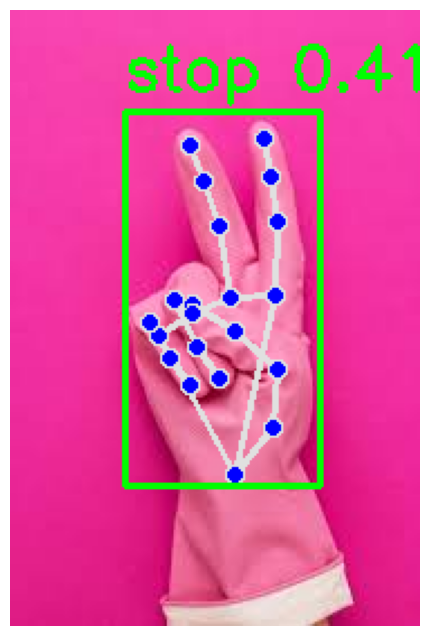

MediaPipe 랜드마크와 YOLOv8 바운딩 박스 시각화 완료.


In [ ]:
import cv2
import mediapipe as mp
from ultralytics import YOLO
import matplotlib.pyplot as plt

# MediaPipe Hands 솔루션 불러오기
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# YOLOv8 모델 로드 (사전 훈련된 모델 사용)
# yolo_model = YOLO('yolov8n.pt')
yolo_model = YOLO('/content/runs/detect/train/weights/best.pt')

image_path = '/content/images.jpg'

# 이미지 불러오기 및 로드 오류 확인
image = cv2.imread(image_path)
if image is None:
    print("오류: 이미지를 불러올 수 없습니다. 이미지 경로 또는 URL을 확인하세요.")
else:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # MediaPipe Hands 모델 초기화
    with mp_hands.Hands(
        static_image_mode=True,
        max_num_hands=2,
        min_detection_confidence=0.5) as hands:

        # MediaPipe로 손 랜드마크 감지
        results_mp = hands.process(image_rgb)

        yolo_results_list = []

        # MediaPipe 감지 결과가 있을 경우
        if results_mp.multi_hand_landmarks:
            for hand_landmarks in results_mp.multi_hand_landmarks:
                # YOLOv8 모델로 탐지 수행 (전체 이미지 대상)
                yolo_results = yolo_model(image_rgb)
                yolo_results_list.append(yolo_results)

    # 결과 시각화
    annotated_image = image_rgb.copy()

    # MediaPipe 랜드마크 그리기
    if results_mp.multi_hand_landmarks:
        for hand_landmarks in results_mp.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                annotated_image,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS)

    # YOLOv8 탐지 결과 그리기
    for yolo_res in yolo_results_list:
        for box in yolo_res[0].boxes:
            # 바운딩 박스 그리기
            x1, y1, x2, y2 = box.xyxy[0]
            cv2.rectangle(annotated_image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

            # 라벨과 신뢰도 출력
            label = yolo_model.names[int(box.cls[0])]
            conf = box.conf[0]
            cv2.putText(annotated_image, f'{label} {conf:.2f}', (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # 최종 이미지 출력
    plt.figure(figsize=(10, 8))
    plt.imshow(annotated_image)
    plt.axis('off')
    plt.show()

    print("MediaPipe 랜드마크와 YOLOv8 바운딩 박스 시각화 완료.")

### 욜로 사람 및 손 학습 Transfer Learning

In [ ]:
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.6 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="S1dfZPlsnHHFOi9CDbyW")
project = rf.workspace("handrecognizer").project("hand-detection-2r6df")
version = project.version(8)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 72.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Hand-Detection-8 in yolov8:: 100%|██████████| 4380/4380 [00:00<00:00, 7612.00it/s]


In [ ]:
import os

label_dir = '/content/Hand-Detection-8/train/labels'

for fname in os.listdir(label_dir):
    if fname.endswith('.txt'):
        path = os.path.join(label_dir, fname)
        with open(path, 'r') as f:
            lines = f.readlines()
        # 기존 0 → 1로 변경
        new_lines = ['1' + line[1:] if line.startswith('0') else line for line in lines]
        with open(path, 'w') as f:
            f.writelines(new_lines)

In [ ]:
label_dir = '/content/Hand-Detection-8/valid/labels'

for fname in os.listdir(label_dir):
    if fname.endswith('.txt'):
        path = os.path.join(label_dir, fname)
        with open(path, 'r') as f:
            lines = f.readlines()
        # 기존 0 → 1로 변경
        new_lines = ['1' + line[1:] if line.startswith('0') else line for line in lines]
        with open(path, 'w') as f:
            f.writelines(new_lines)

In [ ]:
data_yaml = """
train: /content/Hand-Detection-8/train
val:   /content/Hand-Detection-8/valid

nc: 2
names: ['person', 'hand']
"""

with open('person_hand.yaml', 'w') as f:
    f.write(data_yaml)

In [ ]:
import cv2  # 이미지 크기 가져오기용

model = YOLO("yolov8n.pt")

img_dir = "/content/Hand-Detection-8/train/images"
label_dir = "/content/Hand-Detection-8/train/labels"
# img_dir = "/content/Hand-Detection-8/valid/images"
# label_dir = "/content/Hand-Detection-8/valid/labels"

for img_name in os.listdir(img_dir):
    if not img_name.lower().endswith(('.jpg', '.png', '.jpeg')):
        continue

    img_path = os.path.join(img_dir, img_name)
    txt_path = os.path.join(label_dir, img_name.rsplit('.',1)[0]+'.txt')

    # 이미지 크기 가져오기
    img = cv2.imread(img_path)
    h, w = img.shape[:2]

    results = model.predict(img_path, classes=[0], verbose=False)

    if os.path.exists(txt_path):
        with open(txt_path, 'r') as f:
            lines = f.readlines()
    else:
        lines = []

    # 기존 라벨은 그대로 5개 값 유지
    # 이거 안하면 추가로 감지된게 기존 라벨 뒤에 붙어서
    # 막 class x_center y_center width height x_center y_center width height 일케 되버림
    clean_lines = []
    if os.path.exists(txt_path):
        with open(txt_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                clean_lines.append(" ".join(parts[:5]) + "\n")  # 처음 5개 값만 사용

    # 새로 탐지된 사람 박스 추가
    for box in results[0].boxes.xywh:
        x_c, y_c, bw, bh = box.tolist()
        x_c /= w
        y_c /= h
        bw /= w
        bh /= h
        clean_lines.append(f"0 {x_c:.6f} {y_c:.6f} {bw:.6f} {bh:.6f}\n")

    with open(txt_path, 'w') as f:
        f.writelines(clean_lines)

print("Person 바운딩 박스 추가 + normalized 완료 ✅")

Person 바운딩 박스 추가 + normalized 완료 ✅



image 1/1 /content/Hand-Detection-8/train/images/000000000459_jpg.rf.c685f6ca3631470d725b0530c43c8faa.jpg: 640x640 1 person, 1 tie, 8.0ms
Speed: 3.8ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


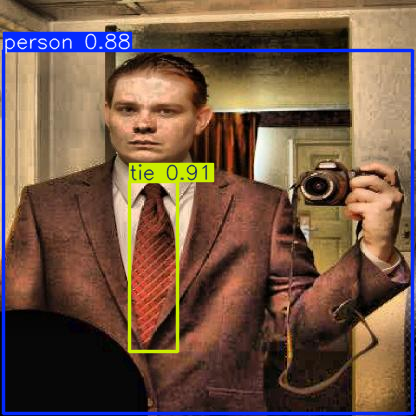

In [ ]:
model = YOLO("yolov8n.pt")
results = model.predict("/content/Hand-Detection-8/train/images/000000000459_jpg.rf.c685f6ca3631470d725b0530c43c8faa.jpg")
results[0].show()

In [ ]:
!yolo detect train \
  model=yolov8n.pt \
  data=person_hand.yaml \
  epochs=50 \
  imgsz=640 \
  batch=16 \
  name=person_hand_yolov8n

Ultralytics 8.3.185 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=person_hand.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=person_hand_yolov8n, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrain


image 1/1 /content/Hand-Detection-8/train/images/000000000459_jpg.rf.c685f6ca3631470d725b0530c43c8faa.jpg: 640x640 1 person, 1 hand, 8.1ms
Speed: 2.6ms preprocess, 8.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


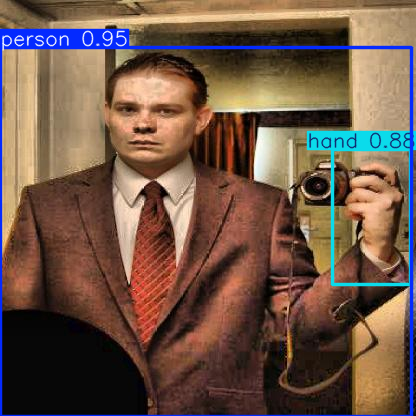

Box: 0.0,47.9727668762207,411.4544982910156,416.0
Box: 332.3271789550781,149.85594177246094,410.2438659667969,284.4486083984375


In [ ]:
model = YOLO("runs/detect/person_hand_yolov8n/weights/best.pt")
image_path = "/content/Hand-Detection-8/train/images/000000000459_jpg.rf.c685f6ca3631470d725b0530c43c8faa.jpg"
# 이미지 테스트

results = model.predict(image_path, conf=0.5, iou=0.45)
results[0].show()

# LSTM용 좌표 추출
for box in results[0].boxes.xyxy:
    x1, y1, x2, y2 = box
    print(f"Box: {x1},{y1},{x2},{y2}")

In [ ]:
import cv2
import os

# 이미지와 라벨 경로
img_path = "/content/Hand-Detection-8/train/images/000000000459_jpg.rf.c685f6ca3631470d725b0530c43c8faa.jpg"
label_path = "/content/Hand-Detection-8/train/labels/000000000459_jpg.rf.c685f6ca3631470d725b0530c43c8faa.txt"

# 클래스 이름
classes = ['person', 'hand']

# 이미지 읽기
img = cv2.imread(img_path)
h, w, _ = img.shape

# 라벨 읽기
with open(label_path, 'r') as f:
    lines = f.readlines()

for line in lines:
    parts = line.strip().split()
    cls_id = int(parts[0])
    x_center, y_center, bw, bh = map(float, parts[1:])

    # YOLO 좌표 -> 픽셀 좌표
    x1 = int((x_center - bw/2) * w)
    y1 = int((y_center - bh/2) * h)
    x2 = int((x_center + bw/2) * w)
    y2 = int((y_center + bh/2) * h)

    # 바운딩 박스와 클래스 이름 그리기
    color = (0, 255, 0) if cls_id == 0 else (0, 0, 255)
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
    cv2.putText(img, classes[cls_id], (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

# 이미지 보여주기
cv2.imshow("Bounding Box", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


### 흠.. 이젠 LSTM 학습해야할 거 같은뎅

In [ ]:
# 일단 데이터셋 재가공부터 하자
import os
import shutil
import pandas as pd

# 1. CSV 불러오기
#csv_path = "/content/my_jester_dataset/Train.csv"
# csv_path = "/content/my_jester_dataset/Validation.csv"
csv_path = "/content/my_jester_dataset/Test.csv"
df = pd.read_csv(csv_path)

# 2. 타겟 클래스 지정
target_classes = [
    'Doing other things', 'No gesture', 'Pushing Hand Away', 'Stop Sign', 'Thumb Up'
]

# 3. 필터링
filtered_df = df[df['label'].isin(target_classes)]

# 4. 원본/저장 경로
# src_root = "/content/my_jester_dataset/Train"
# dst_root = "/content/custom_set/jester/train"
# src_root = "/content/my_jester_dataset/Validation"
# dst_root = "/content/custom_set/jester/valid"
src_root = "/content/my_jester_dataset/Test"
dst_root = "/content/custom_set/jester/test"

os.makedirs(dst_root, exist_ok=True)

# 5. 복사 실행
for _, row in filtered_df.iterrows():
    video_id = row['video_id']
    label = row['label']

    src_dir = os.path.join(src_root, str(video_id))
    dst_dir = os.path.join(dst_root, label, str(video_id))

    if not os.path.exists(src_dir):
        continue

    os.makedirs(dst_dir, exist_ok=True)

    for fname in os.listdir(src_dir):
        src_file = os.path.join(src_dir, fname)
        dst_file = os.path.join(dst_dir, fname)
        shutil.copy2(src_file, dst_file)

print("✅ 필요한 라벨만 custom_set/jester 에 복사 완료!")

Empty DataFrame
Columns: [id, label, frames, label_id, shape, format]
Index: []
✅ 필요한 라벨만 custom_set/jester 에 복사 완료!


In [ ]:
df.head()

,WIN_20180925_17_08_43_Pro_Left_Swipe_new;Left_Swipe_new;0
0,WIN_20180925_17_18_28_Pro_Left_Swipe_new;Left_...
1,WIN_20180925_17_18_56_Pro_Left_Swipe_new;Left_...
2,WIN_20180925_17_19_51_Pro_Left_Swipe_new;Left_...
3,WIN_20180925_17_20_14_Pro_Left_Swipe_new;Left_...
4,WIN_20180925_17_21_28_Pro_Left_Swipe_new;Left_...


In [ ]:
import os
import shutil
import pandas as pd

# 1. CSV 불러오기
csv_path = "/content/my_gesture_dataset/val.csv"  # CSV 경로로 변경하세요
df = pd.read_csv(csv_path, sep=';', engine='python', header=None)
df.columns = ['video', 'label', 'class_id']
df['class_id'] = df['class_id'].astype(int)

# 2. 타겟 클래스 지정
target_classes = [
    "Stop Gesture_new",
    "Stop_new",
    "Thumbs_Up_new"
]

# 3. 필터링
filtered_df = df[df["label"].isin(target_classes)]
print(filtered_df)

# 4. 원본/저장 경로
src_root = "/content/my_gesture_dataset/val"
dst_root = "/content/custom_set/gesture/valid"

os.makedirs(dst_root, exist_ok=True)

# 5. 복사 실행
for _, row in filtered_df.iterrows():
    video = row["video"]   # 이번엔 'video' 컬럼을 사용
    label = row["label"]

    src_dir = os.path.join(src_root, video)          # 원본: /train/{video}
    dst_dir = os.path.join(dst_root, label, video)   # 복사: /custom_set/gesture/train/{label}/{video}

    if not os.path.exists(src_dir):
        print(f"⚠️ {src_dir} 없음, 건너뜀")
        continue

    os.makedirs(dst_dir, exist_ok=True)

    for fname in os.listdir(src_dir):
        src_file = os.path.join(src_dir, fname)
        dst_file = os.path.join(dst_dir, fname)
        shutil.copy2(src_file, dst_file)

print("✅ 필요한 라벨만 custom_set/gesture 에 복사 완료!")

                                         video             label  class_id
26          WIN_20180925_17_30_40_Pro_Stop_new          Stop_new         2
27          WIN_20180925_17_32_32_Pro_Stop_new          Stop_new         2
28          WIN_20180925_17_40_03_Pro_Stop_new          Stop_new         2
29          WIN_20180925_17_49_40_Pro_Stop_new          Stop_new         2
30          WIN_20180925_17_52_42_Pro_Stop_new          Stop_new         2
31          WIN_20180926_16_37_56_Pro_Stop_new          Stop_new         2
32          WIN_20180926_16_47_44_Pro_Stop_new          Stop_new         2
33          WIN_20180926_16_48_48_Pro_Stop_new          Stop_new         2
34          WIN_20180926_17_04_53_Pro_Stop_new          Stop_new         2
35          WIN_20180926_17_08_11_Pro_Stop_new          Stop_new         2
36          WIN_20180926_17_32_15_Pro_Stop_new          Stop_new         2
37          WIN_20180926_17_32_40_Pro_Stop_new          Stop_new         2
38          WIN_20180926_

In [ ]:
import shutil
import os

# 압축할 폴더 경로
folder_path = "/content/custom_set"

# 압축파일 이름 (custom_set.zip)
shutil.make_archive("custom_set", 'zip', folder_path)

# 다운로드
from google.colab import files
files.download("custom_set.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>